Imporing all Libraries

In [306]:
import pandas as pd
from collections import Counter
import numpy as np
import math
import seaborn as sns
import pandas as pd

Reading the dataset

In [307]:
#Reading the dataset

df = pd.read_csv('IR-assignment-2-data (2).txt',sep = " " , header = None)

In [285]:
#Printing the df
df

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,NaN
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,NaN
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,NaN
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,NaN
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239088,0,qid:29989,1:2,2:0,3:1,4:1,5:2,6:1,7:0,8:0.50000,...,128:9754,129:29,130:2889,131:63571,132:1,133:1,134:0,135:0,136:0,NaN
239089,0,qid:29989,1:2,2:0,3:1,4:0,5:2,6:1,7:0,8:0.50000,...,128:84,129:1,130:9450,131:19599,132:4,133:4,134:0,135:0,136:0,NaN
239090,1,qid:29989,1:2,2:0,3:2,4:2,5:2,6:1,7:0,8:1,...,128:1,129:0,130:144,131:6701,132:5,133:2,134:0,135:0,136:0,NaN
239091,1,qid:29989,1:2,2:0,3:2,4:0,5:2,6:1,7:0,8:1,...,128:0,129:11,130:2152,131:65535,132:37,133:16,134:0,135:0,136:0,NaN


In [286]:
#Printing the 138 column
df=df.drop([138], axis=1)

Taking only rows with qid:4

In [287]:
# selecting only qid:4
df = (df.loc[df[1] == 'qid:4'])
df

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:27,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:61,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:31,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:32,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:29,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:62,128:35,129:1,130:153,131:4872,132:9,133:55,134:0,135:0,136:0
99,1,qid:4,1:3,2:0,3:3,4:2,5:3,6:1,7:0,8:1,...,127:52,128:367,129:6,130:153,131:2383,132:18,133:99,134:0,135:16,136:11.3166666666667
100,2,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,127:28,128:0,129:0,130:49182,131:26966,132:15,133:69,134:0,135:193,136:21.9355595468361
101,1,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,127:23,128:0,129:1,130:42877,131:26562,132:12,133:24,134:0,135:56,136:62.9206042323688


Sorting the df by it's relevence score and creating another file

In [288]:
#Sorting the df by it's relevence score and creating another file

df_change=df.copy()
df_change=df_change.sort_values(by=0,ascending=False)
df_change.to_csv('max_dcg.csv')

Renaming the column 0 by Relevence score

In [289]:
#Renaming the 0 column by Relevence score
df_change=df_change.rename({0:'Relevence score'},axis='columns')
df_change

,Relevence score,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
7,3,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,127:32,128:349,129:8,130:123,131:281,132:22,133:6,134:0,135:0,136:0
76,2,qid:4,1:2,2:0,3:1,4:0,5:2,6:0.666667,7:0,8:0.333333,...,127:19,128:0,129:0,130:2417,131:721,132:14,133:113,134:0,135:13,136:47.9
40,2,qid:4,1:3,2:2,3:2,4:0,5:3,6:1,7:0.666667,8:0.666667,...,127:33,128:8,129:3,130:1888,131:9338,132:3,133:11,134:0,135:0,136:0
36,2,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:17,128:0,129:2,130:12028,131:11379,132:26,133:24,134:0,135:77,136:23.9595223404047
90,2,qid:4,1:3,2:0,3:3,4:3,5:3,6:1,7:0,8:1,...,127:67,128:27,129:0,130:814,131:13555,132:108,133:113,134:0,135:0,136:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,0,qid:4,1:2,2:0,3:0,4:0,5:2,6:0.666667,7:0,8:0,...,127:41,128:8,129:0,130:868,131:9260,132:246,133:88,134:0,135:0,136:0
43,0,qid:4,1:2,2:0,3:0,4:0,5:2,6:0.666667,7:0,8:0,...,127:38,128:4,129:0,130:797,131:9260,132:237,133:80,134:0,135:0,136:0
42,0,qid:4,1:3,2:0,3:3,4:1,5:3,6:1,7:0,8:1,...,127:65,128:83,129:5,130:144,131:262,132:157,133:179,134:0,135:0,136:0
41,0,qid:4,1:3,2:1,3:3,4:2,5:3,6:1,7:0.333333,8:1,...,127:65,128:195,129:8,130:124,131:206,132:103,133:121,134:0,135:0,136:0


Printing the unique Relevence score

In [291]:
#Printing the Score

score=df_change['Relevence score'].value_counts()
print('The Unique Relevent Score is Given below')
score

The Unique Relevent Score is Given below


0    59
1    26
2    17
3     1
Name: Relevence score, dtype: int64

Calculating the Maximum DCG

In [292]:
#To calculate the Maximum DCG (IDCG)

def calculating_ideal_dcg(d):
    documents=list(df[0])[:d]
    documents.sort()
    documents.reverse()

    idcg=0
    for i in range(d):
        idcg+=documents[i]/math.log2(i+2)
    return idcg

In [293]:
#Printing the Maximum DCG for 50 documents

idcg_50=calculating_ideal_dcg(50)
print(idcg_50)

12.58382772001186


In [294]:
#Printing the Maximum DCG for All documents

idcg_all=calculating_ideal_dcg(103)
print(idcg_all)

19.407247618668023


In [295]:
#Number of files that can be made

score1=list(score)
count=1
for i in range(len(score1)):
    p=score1[i]
    count*=math.factorial(p)
print(count)

19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


Calculating the DCG

In [296]:
#To calculate the DCG

def calculaing_dcg(d):
    documents=list(df[0])[:d]
    dcg=0
    for i in range(d):
        dcg+=documents[i]/math.log2(i+2)
    return dcg


In [297]:
#Calculating DCG for 50 and All documents
dcg_50=calculaing_dcg(50)
dcg_all=calculaing_dcg(103)

Printing the NDGC for 50 documents

In [298]:
#Calculating and Printing the NDCG for 50 documents

ndcg_50=dcg_50/idcg_50
print("Printing NDCG for 50 Documents")
print(ndcg_50)

Printing NDCG for 50 Documents
0.5717260627203818


Printing the NDGC for All documents

In [299]:
#Calculating and Printing the NDCG for All documents
ndcg_all=dcg_all/idcg_all
print("Printing NDCG for All Documents")
print(ndcg_all)

Printing NDCG for All Documents
0.6357153091990775


In [300]:
df_3=df.copy()

Extracting the TF_idf value from 76 column and storing into the list

In [301]:
#Extracting the TF_idf value from 76 column and storing into the list
tf=[]
for i in df_3.iloc[:,76]:
    tf.append(str(i).split(':')[1])

In [302]:
#converting into float and storing the tf_idf value along with the relevence score into doc_3

tf_idf=[float(i) for i in tf]
df_3.iloc[:,76]=tf_idf

C:\Users\Devanshu\AppData\Local\Temp\ipykernel_13648\3296264913.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_3.iloc[:,76]=tf_idf


In [303]:
#soring the df_3 by it's TF_IDF value in descending order.

df_4=df_3.loc[:,[0,76]].sort_values(by=76,ascending=False)

In [304]:
#Printing the df_4
df_4

,0,76
8,0,972.826451
67,0,612.893205
56,0,571.500533
1,0,538.388954
101,1,528.520116
...,...,...
94,0,15.773388
16,0,14.972391
86,0,14.972391
49,0,3.539923


Plotting the precision vs Recall

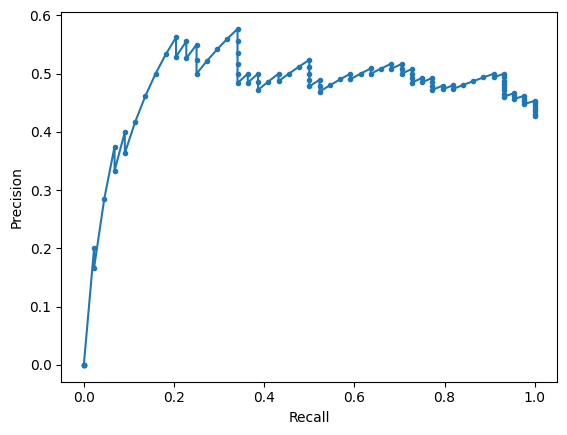

In [305]:
#Plotting the precision vs Recall

from matplotlib import pyplot as py

total_docs=list(df_4[0])
counting_0=total_docs.count(0)
total_relevent=103-counting_0
recall1=[]
precision1=[]

r1=0

for i in range(len(df_4)):
    if(total_docs[i] != 0):
        r1=r1+1
    recall1.append(r1/total_relevent)
    precision1.append(r1/(i+1))


py.plot(recall1, precision1, marker='.',)
py.xlabel('Recall')
py.ylabel('Precision')
py.show()